In [89]:
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'ML_Final_Project/walmart-recruiting-store-sales-forecasting'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd /content/drive/My\ Drive/$FOLDERNAME/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ML_Final_Project/walmart-recruiting-store-sales-forecasting


In [90]:
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')
df = df.merge(stores, how='left', left_on='Store', right_on='Store')
df = df.merge(features, how='left', left_on=['Store','Date'], right_on=['Store','Date'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

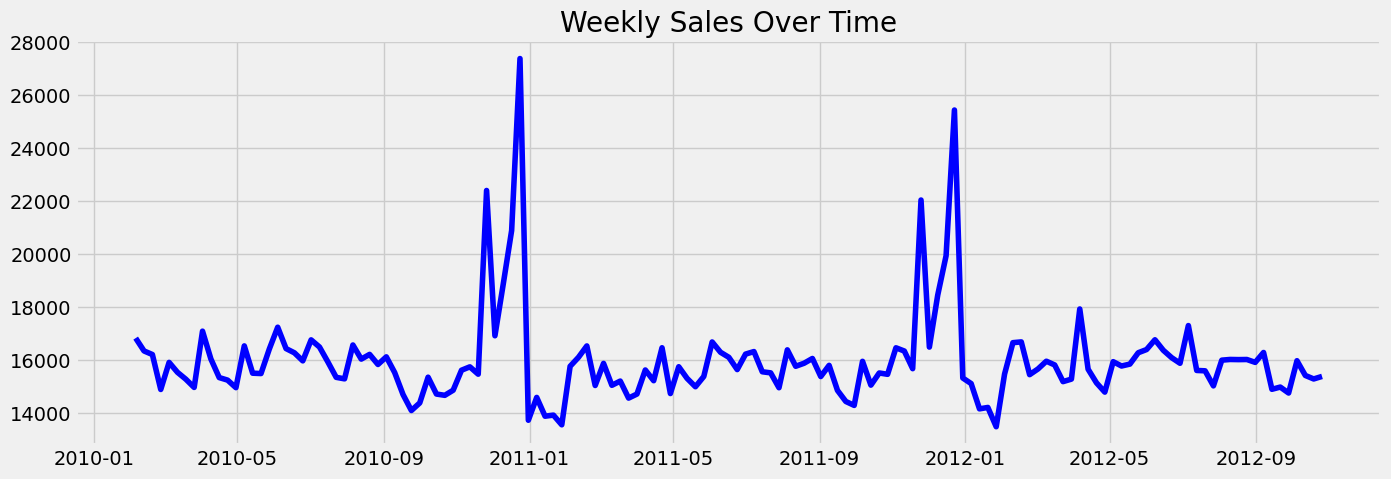

In [92]:
df['Date'] = pd.to_datetime(df['Date'])

df_grouped = df.groupby('Date')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.plot(df_grouped['Date'], df_grouped['Weekly_Sales'], color='blue')
plt.title('Weekly Sales Over Time')
plt.show()

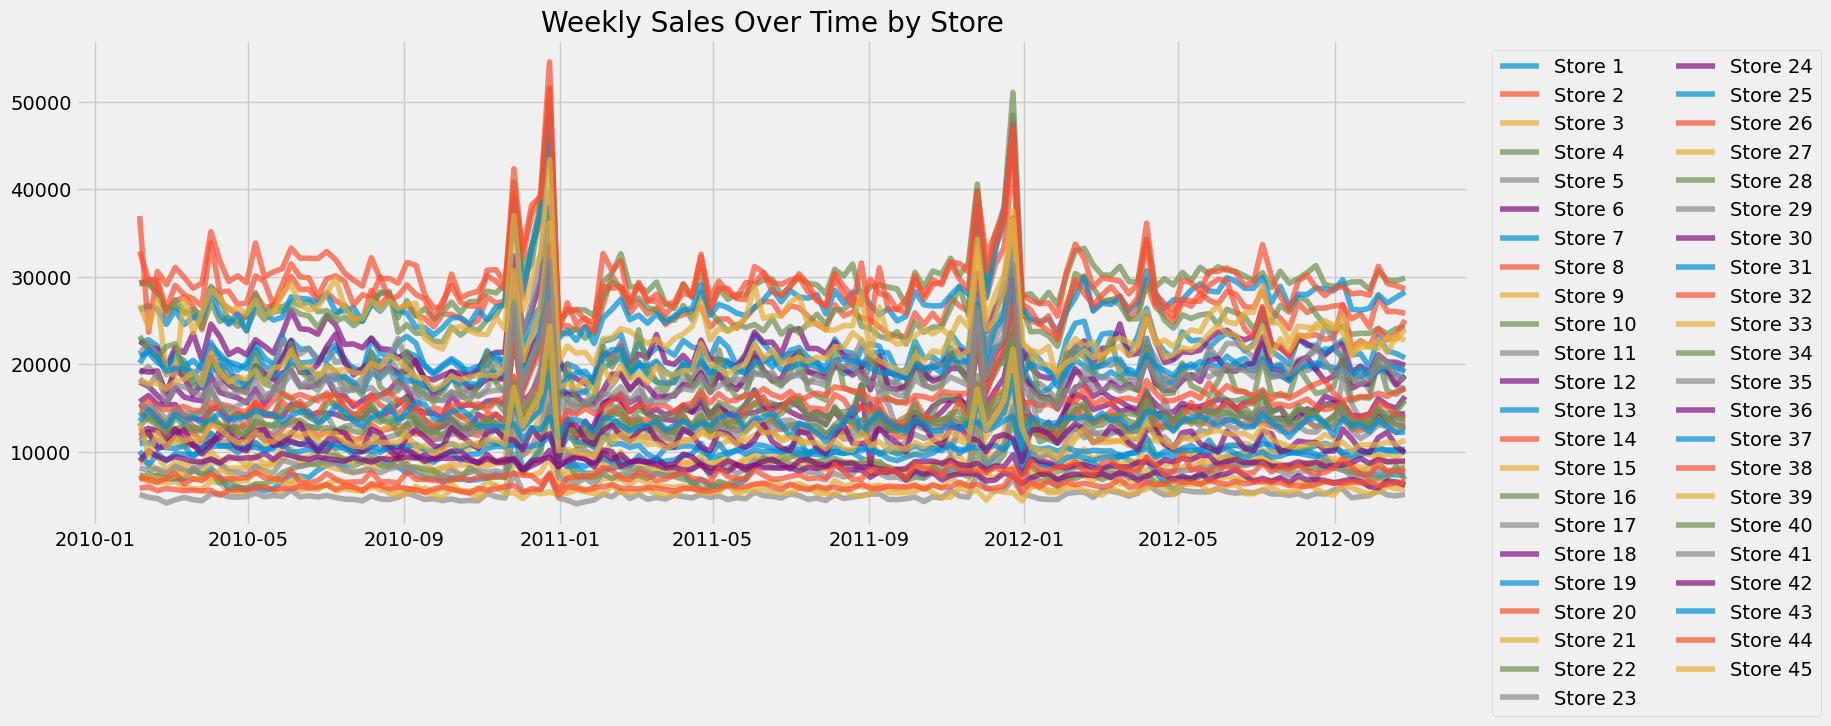

In [93]:
df_store = df.groupby(['Date', 'Store'])['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(16, 6))

for store_id in df_store['Store'].unique():
    store_data = df_store[df_store['Store'] == store_id]
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store_id}', alpha=0.7)

plt.title('Weekly Sales Over Time by Store')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1), ncol=2)
plt.show()

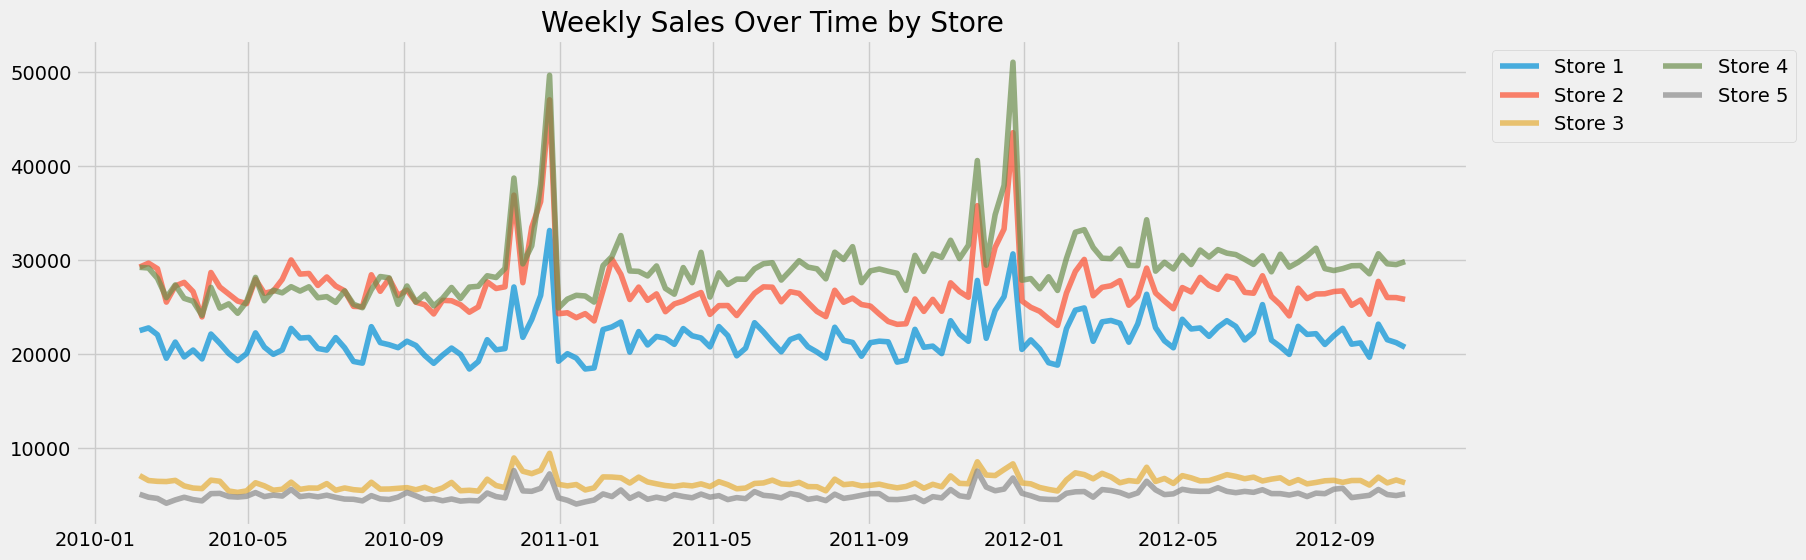

In [94]:
df_store = df.groupby(['Date', 'Store'])['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(16, 6))

for i in range(5):
    store_id = df_store['Store'].unique()[i]
    store_data = df_store[df_store['Store'] == store_id]
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store_id}', alpha=0.7)

plt.title('Weekly Sales Over Time by Store')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1), ncol=2)
plt.show()

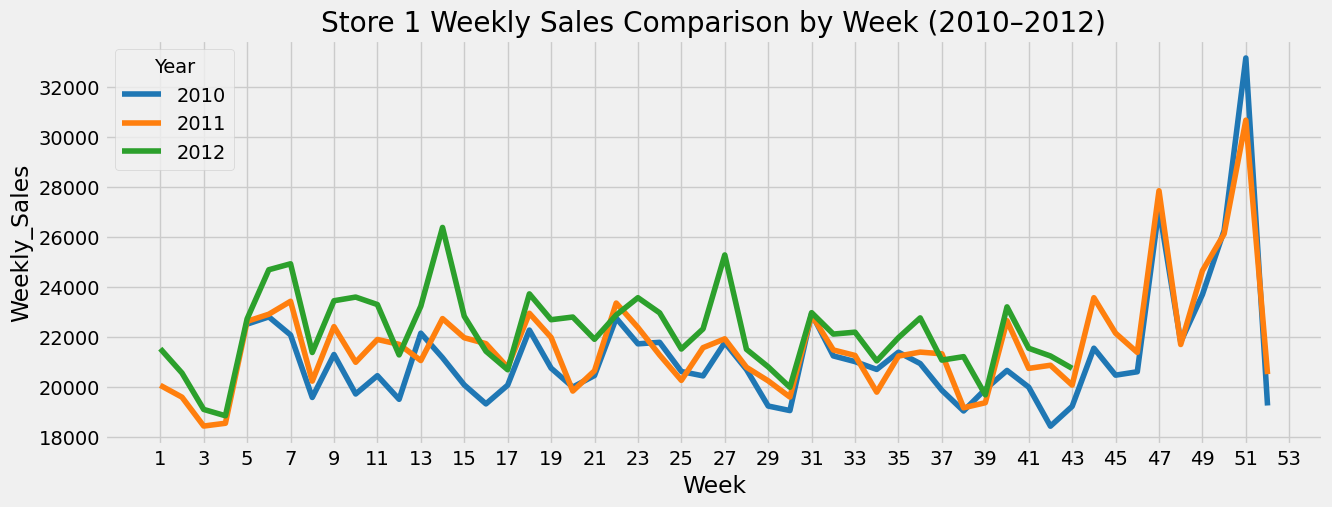

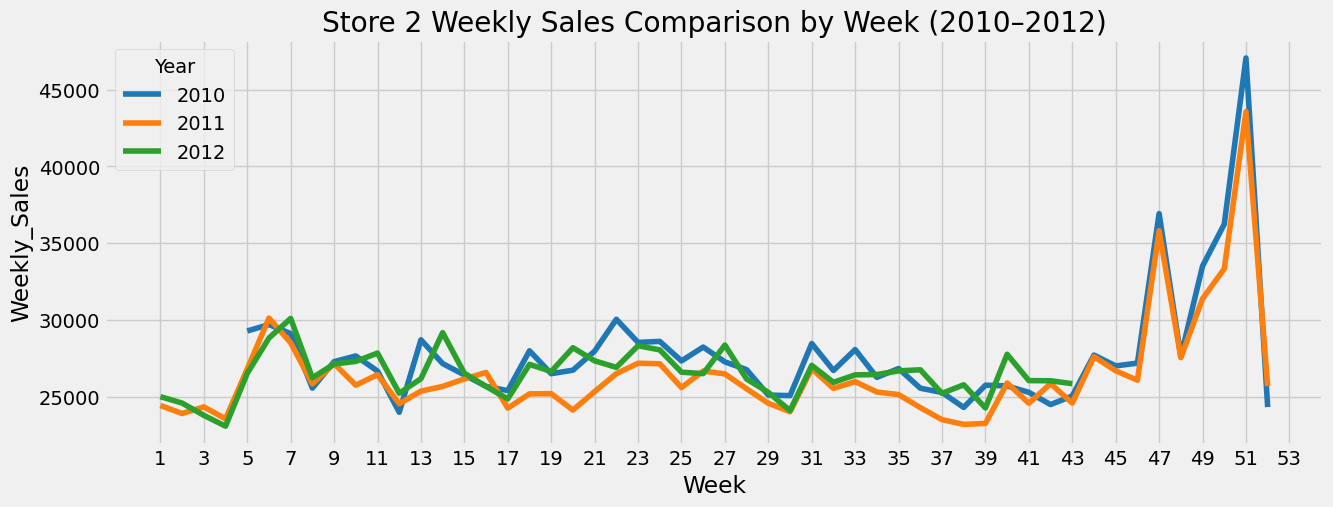

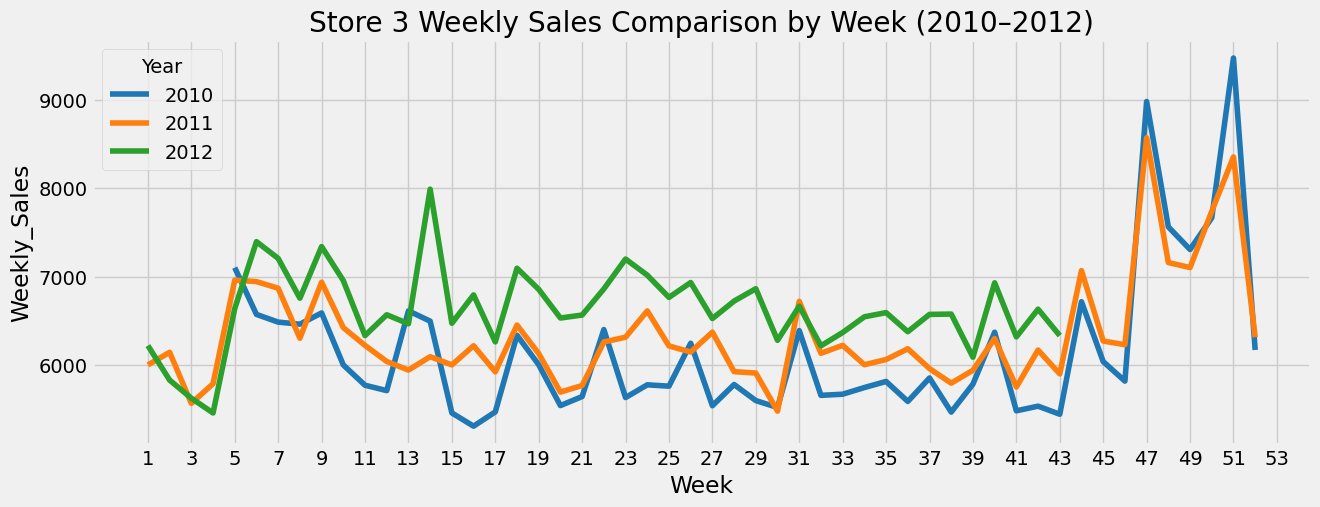

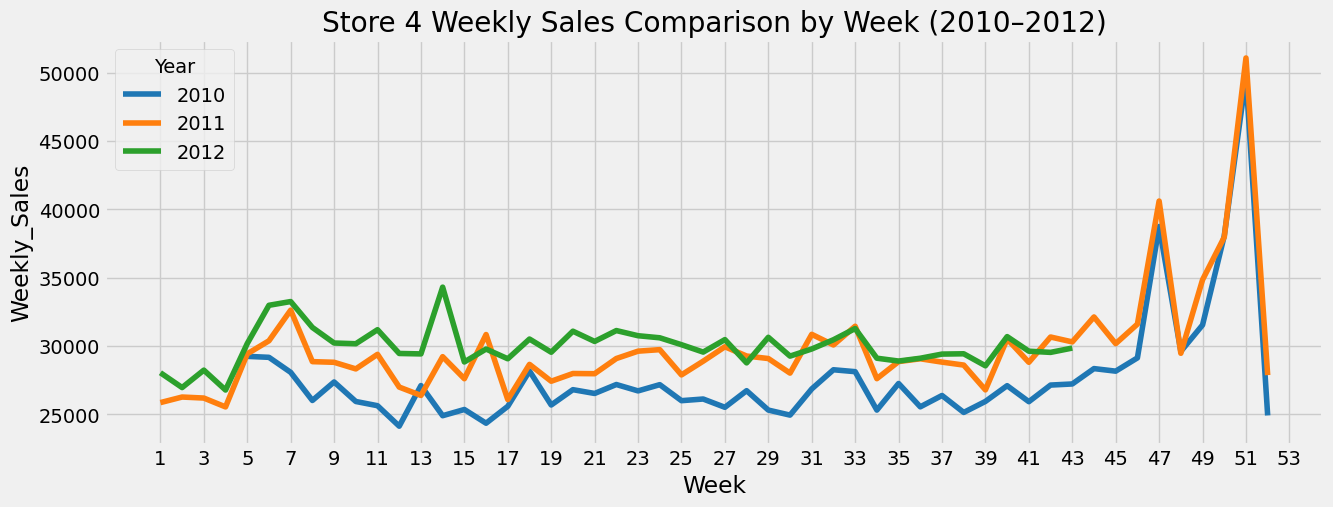

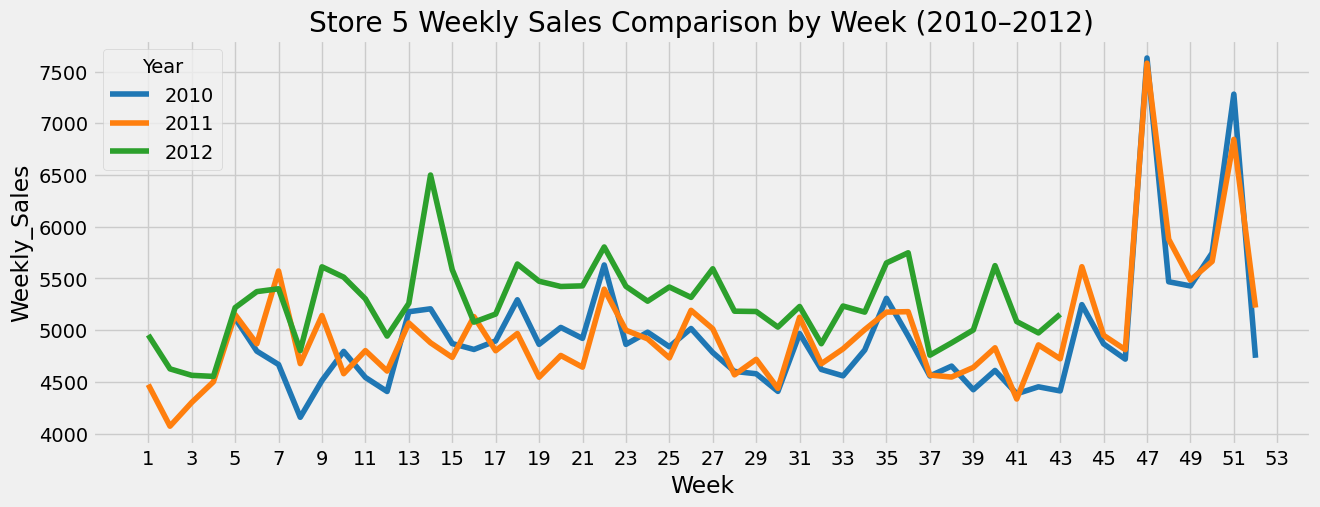

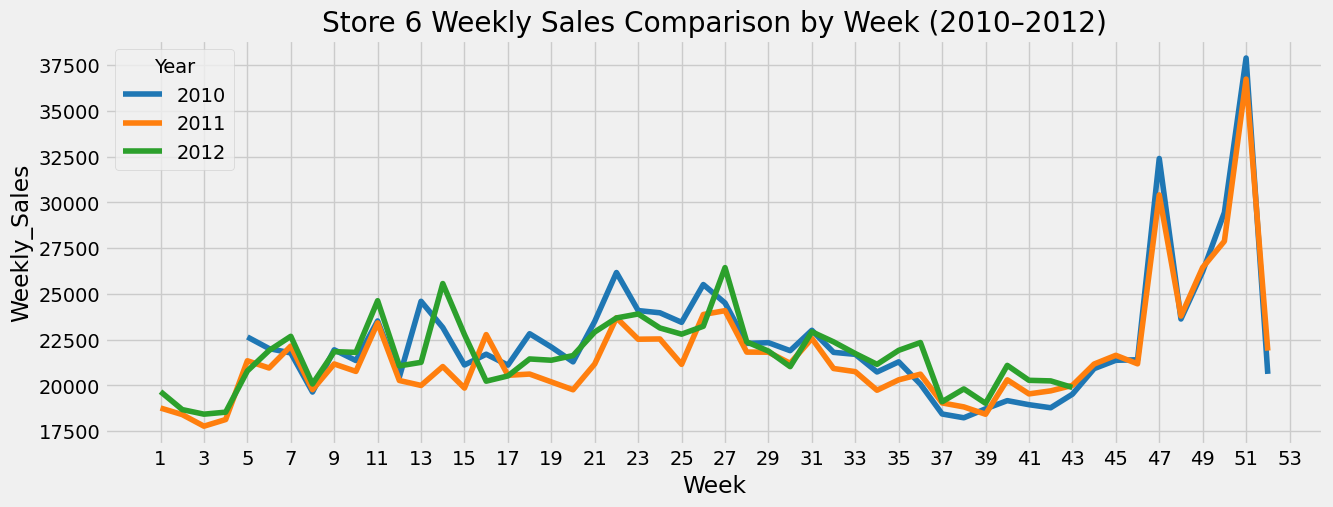

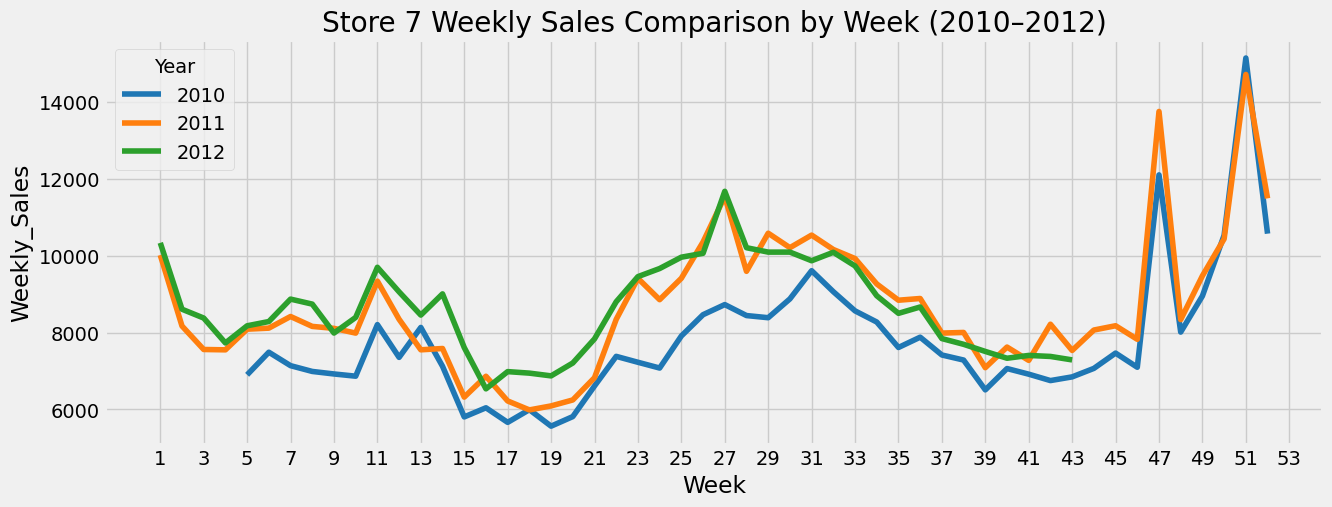

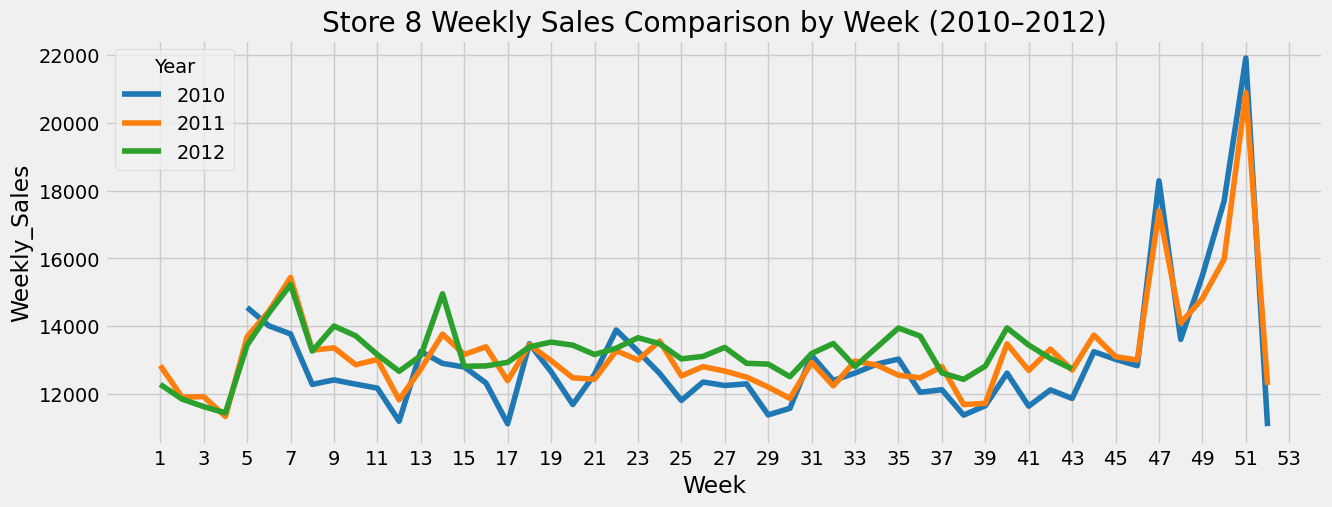

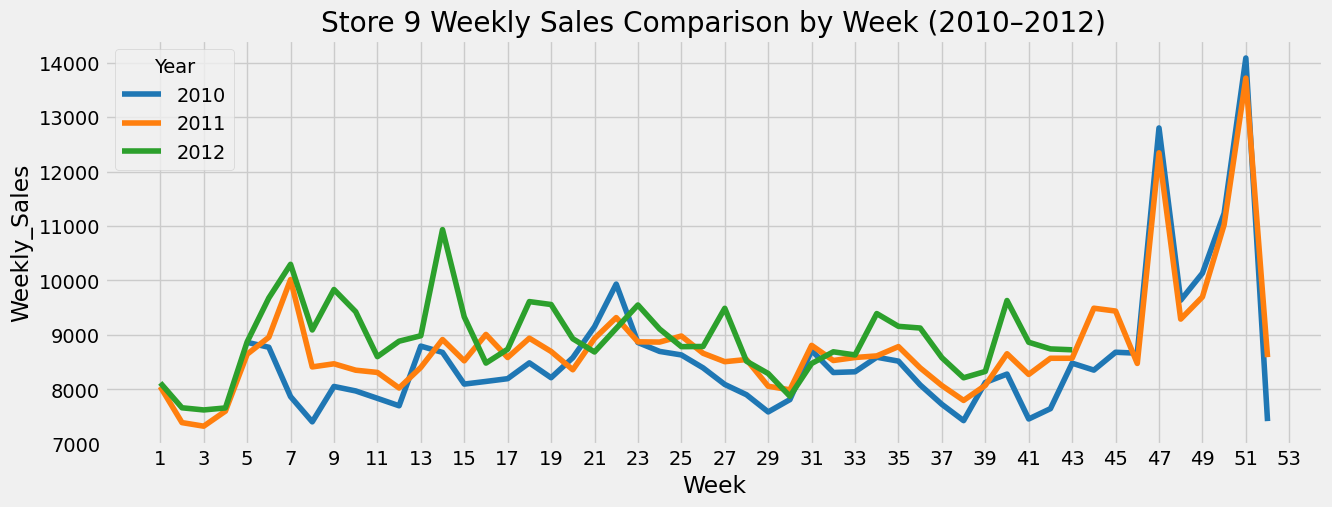

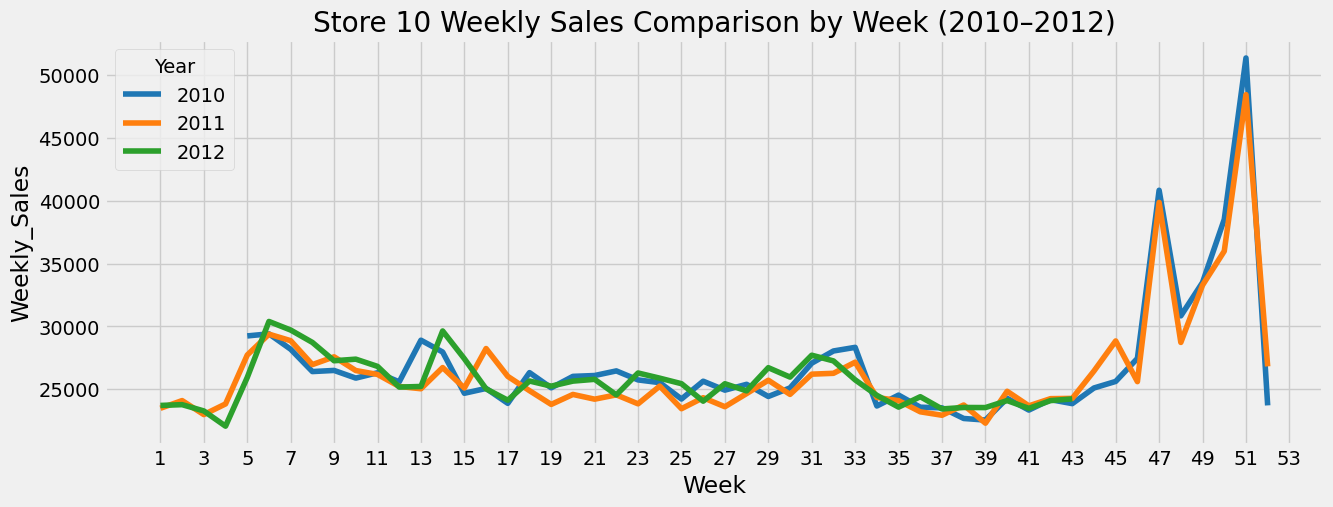

In [95]:
for i in range(1,11):
  store_i_df = df[df['Store'] == i].copy()
  store_i_df['Date'] = pd.to_datetime(store_i_df['Date'])

  store_i_df = store_i_df[store_i_df['Date'].dt.year.isin([2010, 2011, 2012])]

  store_i_df['Year'] = store_i_df['Date'].dt.year
  store_i_df['Week'] = store_i_df['Date'].dt.isocalendar().week

  weekly_sales = store_i_df.groupby(['Year', 'Week'])['Weekly_Sales'].mean().reset_index()

  plt.figure(figsize=(14, 5))
  sns.lineplot(data=weekly_sales, x='Week', y='Weekly_Sales', hue='Year', palette='tab10')
  plt.title(f'Store {i} Weekly Sales Comparison by Week (2010–2012)')
  plt.xticks(range(1, 54, 2))
  plt.show()
  print()

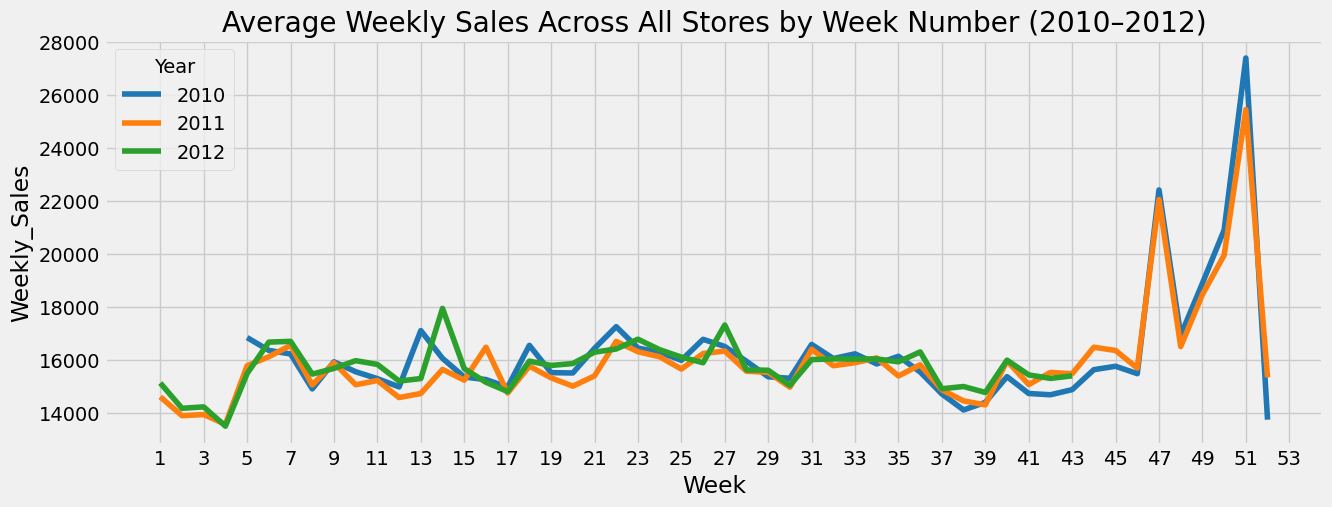

In [96]:
filtered_df = df[df['Date'].dt.year.isin([2010, 2011, 2012])].copy()

filtered_df['Year'] = filtered_df['Date'].dt.year
filtered_df['Week'] = filtered_df['Date'].dt.isocalendar().week

weekly_sales = filtered_df.groupby(['Year', 'Week'])['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(data=weekly_sales, x='Week', y='Weekly_Sales', hue='Year', palette='tab10')
plt.title('Average Weekly Sales Across All Stores by Week Number (2010–2012)')
plt.xticks(range(1, 54, 2))
plt.show()

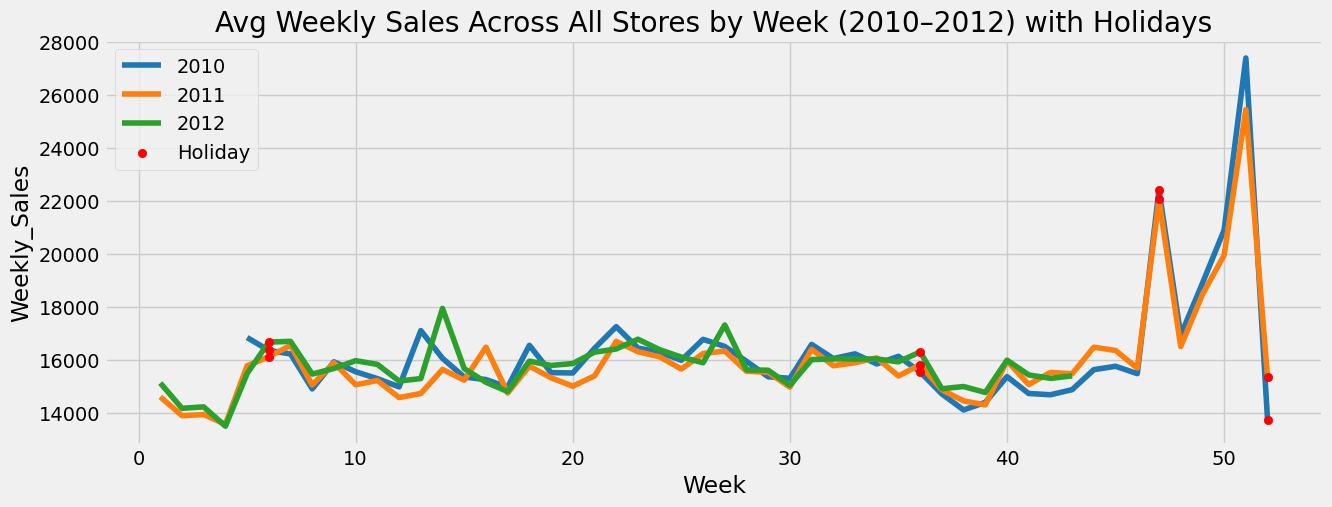

In [97]:
df['Date'] = pd.to_datetime(df['Date'])
filtered_df = df[df['Date'].dt.year.isin([2010, 2011, 2012])].copy()
filtered_df['Year'] = filtered_df['Date'].dt.year
filtered_df['Week'] = filtered_df['Date'].dt.isocalendar().week

weekly_sales = filtered_df.groupby(['Year', 'Week'])['Weekly_Sales'].mean().reset_index()

filtered_df['IsHoliday'] = filtered_df['IsHoliday_x']
holiday_weeks = (
    filtered_df[filtered_df['IsHoliday']]
    .groupby(['Year', 'Week'])
    .size()
    .reset_index()[['Year', 'Week']]
)

weekly_sales['IsHoliday'] = weekly_sales.set_index(['Year', 'Week']).index.isin(
    holiday_weeks.set_index(['Year', 'Week']).index
)

plt.figure(figsize=(14, 5))
sns.lineplot(data=weekly_sales, x='Week', y='Weekly_Sales', hue='Year', palette='tab10')

holiday_points = weekly_sales[weekly_sales['IsHoliday']]
plt.scatter(holiday_points['Week'], holiday_points['Weekly_Sales'], color='red', label='Holiday', zorder=5)

plt.title('Avg Weekly Sales Across All Stores by Week (2010–2012) with Holidays')
plt.legend()
plt.show()